In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS") 


In [2]:
colors = {}

              
colors['LO'] = 'b'#'#1f77b4' 
colors['NLO'] = 'g'#'
colors['NNLO']  = 'r'#'#1f77b4' 
colors['TMD'] =  '#9467bd'
colors['Pythia'] = 'blueviolet'
colors['Django'] = 'dodgerblue'
colors['Rapgap'] = 'darkorange'


styles = {}
styles['NLO'] = 'dotted'#(0, (3, 1))
styles['LO'] = '-'
styles['NNLO'] = '-'
styles['Pythia'] = '-'
styles['Django']  = 'dotted'
styles ['Rapgap'] = '-'

In [3]:
observable = 'dphi'
#observable = 'jetpt'
#observable = 'qt'
#observable = 'jeteta'

symbol = {}
symbol['dphi'] = '$\Delta\phi$ '
symbol['jeteta'] = '$\eta^{jet}$'
symbol['qt']  = '$q_{T}/Q$'
symbol['jetpt'] = '$p_{T}^{jet}$'

In [4]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
                          fmt='None', ecolor='k')

## Hadronization Corrections

In [5]:
with open('outputfiles/HadronizationCorrections.npy','rb') as f:
    hadcorr_pt = np.load(f)
    hadcorr_eta= np.load(f)
    hadcorr_qt = np.load(f)
    hadcorr_dphi = np.load(f)
print (hadcorr_pt)
print(hadcorr_eta)
print(hadcorr_qt)
print(hadcorr_dphi)
if 'jetpt' in observable:
    hadcorr = hadcorr_pt
if 'qt' in observable:
    hadcorr = hadcorr_qt
if 'eta' in observable:
    hadcorr = hadcorr_eta
if 'dphi' in observable:
    hadcorr = hadcorr_dphi
    
print(len(hadcorr))

[0.98076902 1.03136973 1.01227898 0.99658983 0.9867386  0.95952519]
[1.13408833 0.99281384 0.89195556 0.92484372 0.92031218]
[0.99183569 0.95827676 0.98837967 1.04655068 1.07633912 1.06470598
 1.0933708 ]
[0.97850316 0.97315144 0.97552318 1.02054598 1.0531728  1.07405513
 1.05937106]
7


## Reading Django and Rapgap predictions

In [6]:
with open('outputfiles/MCCrossSection_%s_Django_nominal_ep0607_data_nominal.npy'%(observable),'rb') as f:
    Django = np.load(f)
    Django_x = np.load(f)
with open('outputfiles/MCCrossSection_%s_Rapgap_nominal_ep0607_data_nominal.npy'%(observable),'rb') as f:
    Rapgap = np.load(f)
    Rapgap_x = np.load(f)
with open('outputfiles/Rivet_%s.npy'%(observable),'rb') as f:
    Pythia = np.load(f)

print(len(Django))
print(len(Rapgap))
print(len(Pythia))

7
7
7


## Get systematic uncertainties

In [7]:
with open('outputfiles/ResultwithSystematicUncertainties_%s.npy'%(observable), 'rb') as f:
    x = np.load(f)
    y = np.load(f)
    xerr = np.load(f)
    yerr = np.load(f)
print(len(y))

7


## Get statistical uncertainties

In [8]:
#with open('outputfiles/StatisticalErrors_%s.npy'%(observable), 'rb') as f:
#    stat_error = np.load(f)
#    stat_error = np.divide(stat_error,100.0)

    
stat_error = np.zeros(len(y))


if 'pt' in observable:
    stat_error = np.array([ 0.80,0.69,1.73,2.97,4.72, 9.75])
    
elif 'eta' in observable:
    stat_error = np.array([ 1.9,0.56,1.05, 1.93, 3.42])

elif 'dphi' in observable:
    stat_error = np.array([1.44, 0.96,1.34, 1.66, 1.66, 1.99,2.73])
elif 'qt' in observable:
    stat_error = np.array([1.99,1.26,1.61,1.48,1.77,2.84,5.36])

    

stat_error = np.divide(stat_error,100.0)
print(stat_error)
total_error = np.sqrt(np.multiply(stat_error,stat_error)+ np.multiply(yerr,yerr))
print(yerr)
print(total_error)

[0.0144 0.0096 0.0134 0.0166 0.0166 0.0199 0.0273]
[0.08243032 0.09116017 0.05207057 0.07012576 0.06754882 0.04905988
 0.07937536]
[0.08367866 0.09166426 0.05376713 0.07206374 0.06955863 0.05294225
 0.08393889]


No handles with labels found to put in legend.
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


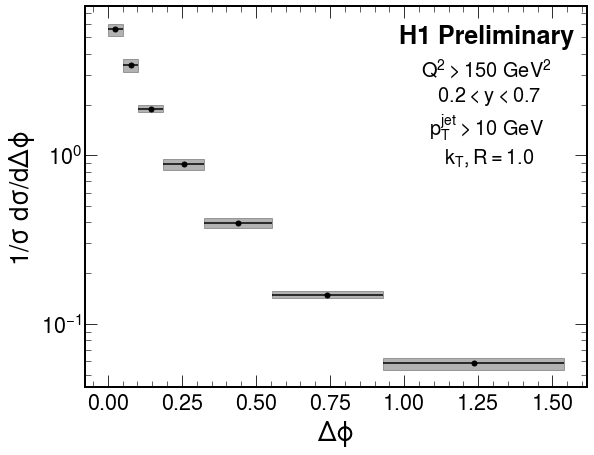

<Figure size 720x720 with 0 Axes>

In [9]:
fig,ax = plt.subplots(figsize=(9,7))

plt.errorbar(x, y,xerr=xerr,yerr=y*stat_error,fmt='o',ms=5,color='k')
plt.ylabel(r'$1/\sigma$ $d\sigma/$d%s'%symbol[observable])
plt.xlabel(symbol[observable])

xposition = 0.2
if 'jetpt' in observable:
    xposition = 0.8
if 'qt' in observable:
    xposition = 0.8
if 'eta' in observable:
    xposition = 0.8
if 'dphi' in observable:
    xposition  = 0.8
    
plt.text(xposition, 0.92,' H1 Preliminary ',
              horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=25, fontweight='bold')

plt.text(xposition, 0.72,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=20)
plt.legend(loc='best',fontsize=18)


#plt.title('H1 Preliminary')
if 'dphi' in observable:
    plt.yscale('log')
if 'eta' in observable:
    print ('eta')

if 'jetpt' in observable:
    plt.xscale('log')
    plt.yscale('log')
    
if 'qt' in observable:
    plt.xscale('log')
    plt.yscale('log')
    

for i in range(len(x)):
    x1 = x[i] - xerr[i]
    x2 = x[i] + xerr[i]
    r  = np.array([x1,x2])
    y1 = y[i]*(1.0+yerr[i])
    y2 = y[i]*(1.0-yerr[i])
    plt.fill_between(r,y1,y2, alpha=0.3,color='k',label='syst. error')

    
if 'eta' in observable:
    plt.ylim(bottom=0.0)
        
plt.show()
plt.tight_layout()

fig.savefig('figures/FinalResult_JustData_%s.png'%observable)

## Compare with MC generators

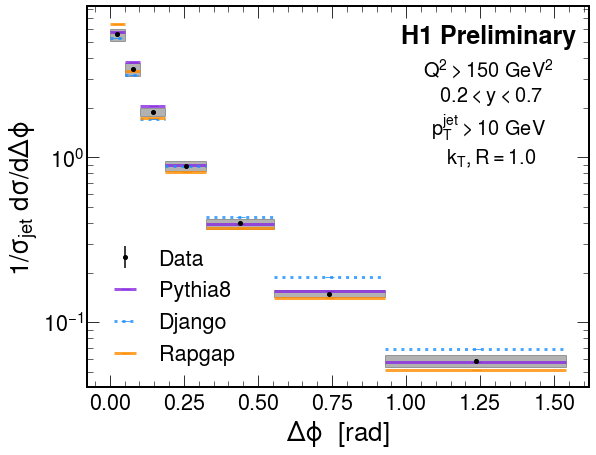

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

In [10]:
fig,ax = plt.subplots(figsize=(9,7))

#plt.fill_between(x['nominal'], do, up,alpha=0.3,color='k',label='syst. error')
pythialine = plt.errorbar(x, Pythia,xerr=xerr,ms=9,lw=3,label='Pythia', 
               alpha=0.8,fmt='_',color=colors['Pythia'])
pythialine[-1][0].set_linestyle(styles['Pythia']) 

djangoline = plt.errorbar(x, Django,xerr=xerr,ms=9,lw=3,label='Django', 
               alpha=0.8,fmt='_',color=colors['Django'])
djangoline[-1][0].set_linestyle(styles['Django']) 

rapgapline = plt.errorbar(x, Rapgap,xerr=xerr,ms=9,lw=3,label='Rapgap', 
               alpha=0.8,fmt='_',color=colors['Rapgap'])
rapgapline[-1][0].set_linestyle(styles['Rapgap']) 

plt.ylabel(r'$1/\sigma_{jet}$ $d\sigma/$d%s'%symbol[observable])
if 'pt' in observable:
    plt.xlabel(symbol[observable]+' [GeV]')
if 'dphi' in observable:
    plt.xlabel(symbol[observable]+' [rad]')
if 'eta' in observable or 'qt' in observable:
    plt.xlabel(symbol[observable])

xposition = 0.2
if 'jetpt' in observable:
    xposition = 0.8
if 'qt' in observable:
    xposition = 0.8
if 'eta' in observable:
    xposition = 0.8
if 'dphi' in observable:
    xposition  = 0.8
plt.text(xposition, 0.92,' H1 Preliminary ',
              horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=25, fontweight='bold')

plt.text(xposition, 0.72,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=20)
plt.legend(loc='best',fontsize=18)


#plt.title('H1 Preliminary')
if 'dphi' in observable:
    plt.yscale('log')
if 'eta' in observable:
    print ('eta')

if 'jetpt' in observable:
    plt.xscale('log')
    plt.yscale('log')
    
if 'qt' in observable:
    plt.xscale('log')
    plt.yscale('log')
    

for i in range(len(x)):
    x1 = x[i] - xerr[i]
    x2 = x[i] + xerr[i]
    r  = np.array([x1,x2])
    y1 = y[i]*(1+yerr[i])
    y2 = y[i]*(1-yerr[i])
    plt.fill_between(r,y1,y2, alpha=0.3,color='k')

    
if 'eta' in observable:
    plt.ylim(bottom=0.0)

#data    
dataline = plt.errorbar(x, y,yerr=y*stat_error,fmt='o',color='k',ms=4)

#plt.legend(loc='lower left')
ax.legend(handles=[dataline,pythialine,djangoline,rapgapline],
                  labels=['Data','Pythia8','Django','Rapgap'],loc='lower left')
plt.show()
plt.tight_layout()

fig.savefig('figures/FinalResult_withMC_%s.png'%observable)
fig.savefig('figures/FinalResult_withMC_%s.pdf'%observable)

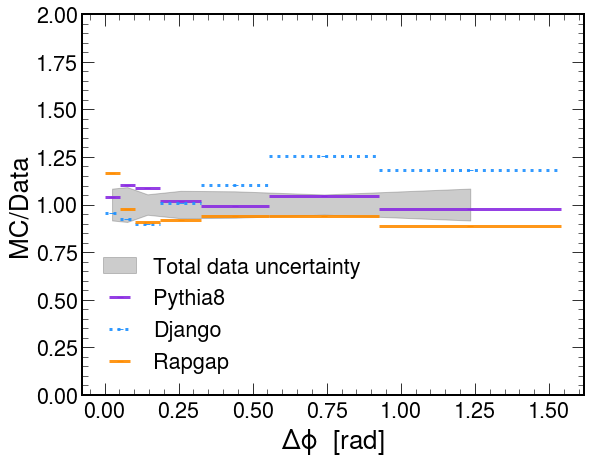

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

In [11]:

fig,ax = plt.subplots(figsize=(9,7))



pythialine = plt.errorbar(x, np.divide(Pythia,y), xerr=xerr,label='Pythia8',lw=3,
               alpha=0.9,fmt='_',color=colors['Pythia'])
pythialine[-1][0].set_linestyle(styles['Pythia']) 

djangoline = plt.errorbar(x, np.divide(Django,y), xerr=xerr,label='Django',lw=3,
               alpha=0.9,fmt='_',color=colors['Django'])
djangoline[-1][0].set_linestyle(styles['Django']) 

rapgapline = plt.errorbar(x, np.divide(Rapgap,y), xerr=xerr,label='Rapgap',lw=3,
               alpha=0.9,fmt='_',color=colors['Rapgap'])
rapgapline[-1][0].set_linestyle(styles['Rapgap']) 


#for i in y_theory.keys():

#   plt.errorbar(x, np.divide(y_theory[i],y), xerr=xerr,label=i + ' x NP',lw=3, alpha=0.8,fmt="None",linestyle='--',color=colors[i])
dataline = plt.fill_between(x,1 + total_error, 1-total_error,alpha=0.2,color='black',label='data uncertainty')


for i in range(len(x)):
    x1 = x[i] - xerr[i]
    x2 = x[i] + xerr[i]
    r  = np.array([x1,x2])
    up = 1+yerr[i]
    do = (1-yerr[i])
    #dataline = plt.fill_between(r,up,do, alpha=0.3,color='k')


if 'qt' in observable or 'pt' in observable:
    #plt.yscale('log')
    plt.xscale('log')
    
plt.ylabel('MC/Data')
plt.ylim([0.0,2.0])
plt.ylim(bottom=0.0)
if 'pt' in observable:
    plt.xlabel(symbol[observable]+' [GeV]')
if 'dphi' in observable:
    plt.xlabel(symbol[observable]+' [rad]')
if 'eta' in observable or 'qt' in observable:
    plt.xlabel(symbol[observable])

ax.legend(handles=[dataline,pythialine,djangoline,rapgapline], 
              labels=['Total data uncertainty','Pythia8','Django','Rapgap'],loc='best')
plt.show()

plt.tight_layout()

fig.savefig('figures/MoneyPlot_withMC_ratio%s.png'%observable)
fig.savefig('figures/MoneyPlot_withMC_ratio%s.pdf'%observable)

## Compare to Theory

In [12]:
if 'jetpt' in observable:
    x_theory =  np.array([12.11528 , 17.78279,26.10157, 38.31187,56.23413,82.54042])
    y_theory = {}
    yerr_theory = {}
    y_theory['NNLO'] = np.array([0.110608780252012,0.0456758655730057,0.0116618565044425, 0.00266858037373604,0.000528808263749211,0.0000671679068329452
    ]) 
    y_theory['NLO'] = np.array([0.114972236247544,0.0434595047765226,0.0111137562868369, 0.0025582605108055,
                        0.000530057158644401,0.0000669826006876228])


    y_theory['LO'] = np.array([0.126311587752757,0.0392631056525735,0.009476532421875,0.00219986565946691,0.000475337005974265,0.000059703125])
elif 'eta' in observable:
    x_theory = np.array([-0.65000,0.05000,0.75000,1.45000,2.15000])
    y_theory = {}
    y_theory['NNLO'] = np.array([0.381056962886138,   0.648753612714769, 0.283387576607635,    0.0866357787908942,  0.0311693141399885  ])

    y_theory['NLO'] = np.array([   0.435720929125737, 0.662697941367878, 0.2476178480722,   0.064762021046169,      0.0174297291748527 ])


    y_theory['LO'] = np.array([   0.638976927757353,  0.647736878515625,  0.127572861408548,   0.0150334895909926,  0.000342266452205882])


elif 'qt' in observable: 
    x_theory = np.array([4.4260E-02 ,1.0222E-01 ,2.0541E-01 ,0.38915,0.71630 ,1.29878 ,2.33589])
    y_theory = {}
    y_theory['NNLO'] = np.array([  10.6607929515419, 4.40753793441018, 1.75115026921194, 0.680162928536466, 0.228549161184533,
  0.0723233213901126, 0.00711814982868331  ])

    y_theory['NLO'] = np.array([   13.9724950884086,   4.09626719056974,   1.48059921414538, 0.544507609823183,     0.172372147740668 ,
   0.0506518751964637,     0.00532571900785855 ])
    

    
elif 'dphi' in observable: 
    x_theory = np.array([ 0.02535  ,
       0.076528 ,    
       0.14472 ,   
      0.25656 ,  
     0.43999 ,
    0.74084,  
   1.23427 ])                      
  

    y_theory = {}
    y_theory['NNLO'] =          np.array([
      2.948883703,
   5.080398798,
     2.285326073,
    1.029606256,
    0.448229084,
     0.180944874,
     0.069115077])

    y_theory['NLO'] =   np.array([                                                  
    5.007400243,
    5.007165361,
    2.037729236,
    0.870201098,
    0.36389505,
    0.141454601,
    0.050938785
    ])
    


    
kang_x = np.array([1.00E-02,   4.00E-02,   7.00E-02 ,   1.00E-01, 1.30E-01 ,1.60E-01,  1.90E-01, 2.20E-01 ,  2.50E-01  ,  2.80E-01, 3.10E-01,
                      4.10E-01,   
    4.50E-01,
    4.90E-01, 
    5.30E-01, 
    5.70E-01,    
    6.10E-01,    
    6.50E-01,  
    6.90E-01,   
    7.30E-01,    
    7.70E-01,    
    8.10E-01
])
kang_y = np.array([3.61E+03,  7.66E+03,6.63E+03,5.50E+03, 4.71E+03, 3.93E+03,    3.30E+03,2.74E+03,2.29E+03,  
                   1.90E+03  ,  1.64E+03,
      1.04E+03,
  8.66E+02,
       7.31E+02,
        6.13E+02,
      5.24E+02,
       4.42E+02,
        3.89E+02,
        3.36E+02,
       2.92E+02,
      2.47E+02,
       2.16E+02 
])




kang_y = kang_y/914.46 



feng_x = np.array(
[
2.,
 2.1,
 2.2,
2.3,
2.4,
 2.45, 
 2.5,  
 2.55,  
 2.6, 
 2.65, 
 2.7, 
 2.75, 
 2.8, 
 2.85, 
 2.9, 
 2.95, 
 3.,   
 3.02,
 3.04,
 3.06,  
 3.08, 
 3.1, 
 3.11,  
 3.12,
 3.13, 
 3.1416])

feng_x = 3.1416-feng_x


feng_y = np.array([
  0.00179917,  
  0.00331018,
  0.00539893, 
  0.00833971, 
  0.0126007,
  0.0154574, 
  0.0189805, 
   0.0233841, 
  0.028952,
  0.0360966, 
   0.0454342, 
  0.0579107,
  0.074916,
   0.0984489,
  0.132818,
  0.181728,
  0.259287, 
  0.300555,
  0.350406,
   0.411112,
  0.485287,
  0.572557, 
    0.618239,
 0.659469,
  0.694866,
 0.711227
    
    
    
])

feng_y_norm = feng_y/np.sum(feng_y)


No handles with labels found to put in legend.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
Substituting with a symbol from Computer Modern.


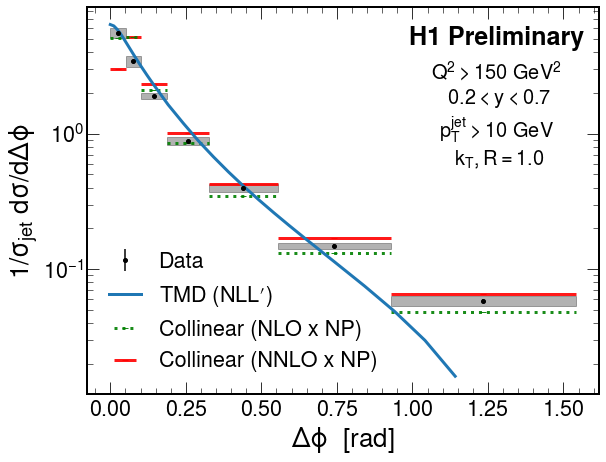

In [15]:
fig,ax = plt.subplots(figsize=(9,7))
##plot data
#plt.errorbar(x, y,fmt='o',color='k')
plt.ylabel(r'$1/\sigma_{jet}$ $d\sigma/$d%s'%symbol[observable])
if 'pt' in observable:
    plt.xlabel(symbol[observable]+' [GeV]')
if 'dphi' in observable:
    plt.xlabel(symbol[observable]+' [rad]')
if 'eta' in observable or 'qt' in observable:
    plt.xlabel(symbol[observable])







##plot systematic uncertainty of data
for i in range(len(x)):
    x1 = x[i] - xerr[i]
    x2 = x[i] + xerr[i]
    r  = np.array([x1,x2])
    up = y[i]*(1+yerr[i])
    do = y[i]*(1-yerr[i])
    plt.fill_between(r,up,do, alpha=0.3,color='k')
#plot pQCD calculations



xposition = 0.2
if 'jetpt' in observable:
    xposition = 0.8
if 'qt' in observable:
    xposition = 0.8
if 'eta' in observable:
    xposition = 0.8
if 'dphi' in observable:
    xposition  = 0.8
    
plt.text(xposition, 0.92,' H1 Preliminary ',
              horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=25, fontweight='bold')

plt.text(xposition, 0.72,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes, fontsize=20)
plt.legend(loc='best',fontsize=18)




line3 = plt.errorbar(x, np.divide(y_theory['NNLO'],hadcorr), xerr=xerr,label='NNLO x NP',lw=3,
               alpha=0.9,fmt='_',color=colors['NNLO'])
line3[-1][0].set_linestyle(styles['NNLO']) 

if 'qt' not in observable and 'dphi' not in observable:
    line1 = plt.errorbar(x, np.divide(y_theory['LO'],hadcorr), xerr=xerr,label='LO x NP',lw=3,
                   alpha=0.9,fmt='_',color=colors['LO'])
    line1[-1][0].set_linestyle(styles['LO']) 

line2 = plt.errorbar(x, np.divide(y_theory['NLO'],hadcorr), xerr=xerr,label='NLO x NP',lw=3,
               alpha=0.9,fmt='_',color=colors['NLO'])
line2[-1][0].set_linestyle(styles['NLO']) 

norm = np.sum(y)

if 'qt' in observable:
    tmdline = plt.errorbar(kang_x[1:],kang_y[1:]/2.0,label='TMD (LO+NLL$^{\prime}$)',lw=3)

if 'dphi' in observable:
    tmdline = plt.errorbar(feng_x,9*feng_y,label='TMD (LO+NLL$^{\prime}$)',lw=3)

#line2[-1][0].set_dashes('dotted')
    

#line3[-1][0].set_dashes('dotted')
    
    
##plot data again
dataline = plt.errorbar(x, y,yerr=y*stat_error,fmt='o',color='k',ms=4)
#print(len(y))
#print(len(x))
#hep.histplot(y, x, label="Test")

if 'qt' in observable or 'pt' in observable:
    plt.yscale('log')
    plt.xscale('log')    
if 'dphi' in observable :
    plt.yscale('log')

#plt.legend(loc='lower left')
#handles, labels = ax.get_legend_handles_labels()
if 'qt' not in observable and 'dphi' not in observable:
    ax.legend(handles=[dataline,line1,line2,line3],
          labels=['Data','LO x NP','NLO x NP','NNLO x NP'],loc='lower left')

elif 'qt' in observable or 'dphi' in observable:
    ax.legend(handles=[dataline,tmdline,line2,line3],
          labels=['Data','TMD (NLL$\prime$)','Collinear (NLO x NP)','Collinear (NNLO x NP)'],loc='lower left')
plt.tight_layout()

fig.savefig('figures/MoneyPlot_withpQCD%s.png'%observable)
fig.savefig('figures/MoneyPlot_withpQCD%s.pdf'%observable)

## Ratio plot

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


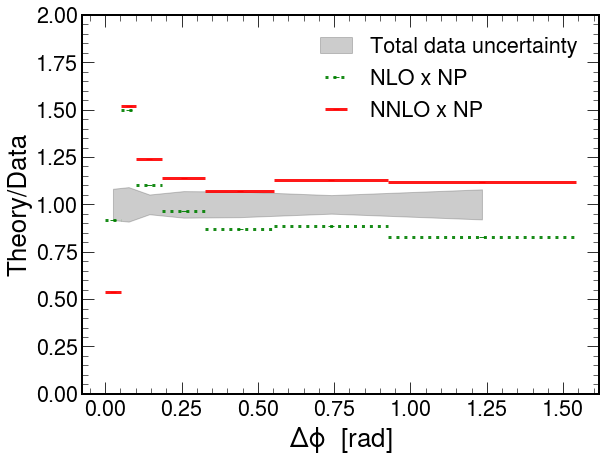

In [14]:

fig,ax = plt.subplots(figsize=(9,7))



line3 = plt.errorbar(x, np.divide(np.divide(y_theory['NNLO'],hadcorr),y), xerr=xerr,label='NNLO x NP',lw=3,
               alpha=0.9,fmt='_',color=colors['NNLO'])
line3[-1][0].set_linestyle(styles['NNLO']) 

if 'qt' not in observable and 'dphi' not in observable:
    line1 = plt.errorbar(x, np.divide(np.divide(y_theory['LO'],hadcorr),y), xerr=xerr,label='LO x NP',lw=3,
               alpha=0.9,fmt='_',color=colors['LO'])
    line1[-1][0].set_linestyle(styles['LO']) 

line2 = plt.errorbar(x, np.divide(np.divide(y_theory['NLO'],hadcorr),y), xerr=xerr,label='NLO x NP',lw=3,
               alpha=0.9,fmt='_',color=colors['NLO'])
line2[-1][0].set_linestyle(styles['NLO']) 


#for i in y_theory.keys():

#   plt.errorbar(x, np.divide(y_theory[i],y), xerr=xerr,label=i + ' x NP',lw=3, alpha=0.8,fmt="None",linestyle='--',color=colors[i])
dataline = plt.fill_between(x,1 + yerr, 1-yerr,alpha=0.2,color='black',label='data uncertainty')


for i in range(len(x)):
    x1 = x[i] - xerr[i]
    x2 = x[i] + xerr[i]
    r  = np.array([x1,x2])
    up = 1+yerr[i]
    do = (1-yerr[i])
    #dataline = plt.fill_between(r,up,do, alpha=0.3,color='k')


if 'qt' in observable or 'pt' in observable:
    #plt.yscale('log')
    plt.xscale('log')
    
plt.ylabel('Theory/Data')
if 'qt' not in observable and 'eta' not in observable:
    plt.ylim([0.0,2.0])
else:
    plt.ylim(bottom=0.0)
if 'pt' in observable:
    plt.xlabel(symbol[observable]+' [GeV]')
if 'dphi' in observable:
    plt.xlabel(symbol[observable]+' [rad]')
if 'eta' in observable or 'qt' in observable:
    plt.xlabel(symbol[observable])

if 'qt' not in observable and 'dphi' not in observable:
    ax.legend(handles=[dataline,line1,line2,line3], 
              labels=['Total data uncertainty','LO x NP','NLO x NP','NNLO x NP'],loc='best')
else :
    ax.legend(handles=[dataline,line2,line3], 
              labels=['Total data uncertainty','NLO x NP','NNLO x NP'],loc='best')
plt.tight_layout()

fig.savefig('figures/MoneyPlot_withpQCD_ratio%s.png'%observable)
fig.savefig('figures/MoneyPlot_withpQCD_ratio%s.pdf'%observable)